# 신경망 구조

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

## AND게이트

In [3]:
# AND함수는 a,b둘다 1이여야 1이다.
def AND(a,b):
    input = np.array([a,b]) # 입력값
    weight = np.array([0.4,0.4]) # 가중치
    bias = -0.6
    value = np.sum(input * weight) + bias # 입력값과 가중치를 곱한것을 합친것 + bias

    if value <= 0:
        return 0
    else:
        return 1

In [4]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


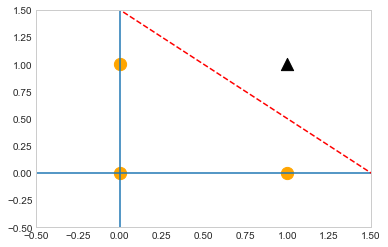

In [5]:
# 그래프로 표현
x1=np.arange(-2, 2, 0.01)
x2=np.arange(-2, 2, 0.01)
bias=-0.6

y=(-0.4 * x1 -bias ) / 0.4

plt.axvline(x=0) # 그래프위에 x축으로 선긋기
plt.axhline(y=0) # 그래프위에 y축으로 선긋기
plt.plot(x1,y,'r--')
plt.scatter(0,0,color='orange', marker='o', s=150)
plt.scatter(0,1,color='orange', marker='o', s=150)
plt.scatter(1,0,color='orange', marker='o', s=150)
plt.scatter(1,1,color='black', marker='^', s=150)
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.grid()
plt.show()

## OR 게이트

In [6]:
def OR(a,b):
    input = np.array([a,b])
    weights = np.array([0.4,0.5])
    bias = -0.3
    value = np.sum(input * weights) + bias
    
    if value <=0:
        return 0
    else:
        return 1

In [7]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


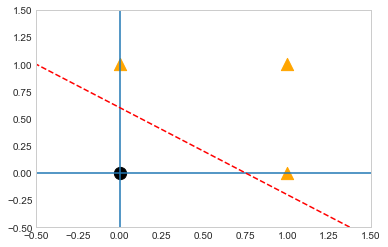

In [11]:
# 그래프로 표현
x1=np.arange(-2, 2, 0.01)
x2=np.arange(-2, 2, 0.01)
bias=-0.3

y=(-0.4 * x1 -bias ) / 0.5

plt.axvline(x=0) # 그래프위에 x축으로 선긋기
plt.axhline(y=0) # 그래프위에 y축으로 선긋기
plt.plot(x1,y,'r--')
plt.scatter(0,0,color='black', marker='o', s=150)
plt.scatter(0,1,color='orange', marker='^', s=150)
plt.scatter(1,0,color='orange', marker='^', s=150)
plt.scatter(1,1,color='orange', marker='^', s=150)
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.grid()
plt.show()

## NAND 게이트

In [9]:
def NAND(a,b):
    input = np.array([a,b])
    weights = np.array([-0.6,-0.5])
    bias = 0.7
    value = np.sum(input * weights) + bias
    
    if value <=0:
        return 0
    else:
        return 1

In [10]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


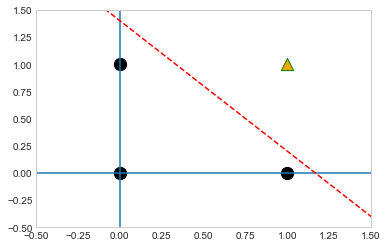

In [20]:
# 그래프로 표현
x1=np.arange(-2, 2, 0.01)
x2=np.arange(-2, 2, 0.01)
bias=0.7

y=(0.6 * x1 -bias ) / -0.5

plt.axvline(x=0) # 그래프위에 x축으로 선긋기
plt.axhline(y=0) # 그래프위에 y축으로 선긋기
plt.plot(x1,y,'r--')
plt.scatter(0,0,color='black', marker='o', s=150)
plt.scatter(0,1,color='black', marker='o', s=150)
plt.scatter(1,0,color='black', marker='o', s=150)
plt.scatter(1,1,color='orange', marker='^', s=150, edgecolor='g')
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.grid()
plt.show()

## XOR 게이트
- 인공지능 첫번쨰 겨울
- 딥러닝의 첫번째 위기 : 비선형 문제는 어떻게 해결할것인가? -> 다층 퍼셉트론으로 해결함!
- AND,OR,NAND 다 합침

### 다층퍼셉트론(MLP,Multi Layer Perceptron)
- hidden layer(은닉층) 라는게 생김

In [21]:
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2) # NAND와 OR 결과를 AND로 묶는다!
    return y

In [23]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


## 활성화함수

In [25]:
def stepf(x):
    if x>0:
        return 1
    else:
        return 0

In [28]:
def stepf_for_numpy(x):
    y = x > 0
    return y.astype(np.int)

In [29]:
print(stepf(-3)) # 0보다 작으니까 0 출력
print(stepf(5)) # 0보다 크니까 1 출력

a=np.array([5,3,-4,2.0])
print(stepf_for_numpy(a)) # array형태로 0보다 큰건 1출력, 작은건 0 출력

0
1
[1 1 0 1]


<ipython-input-28-2899c27e0fcc>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


In [30]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [31]:
# 0~1 사이의 값 출력됨
print(sigmoid(3)) # 1에 근접하지만 1에 닿지는 않음
print(sigmoid(-3)) # 0에 근접하지만 닿지는 않음

0.9525741268224334
0.04742587317756678


<ipython-input-28-2899c27e0fcc>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return y.astype(np.int)


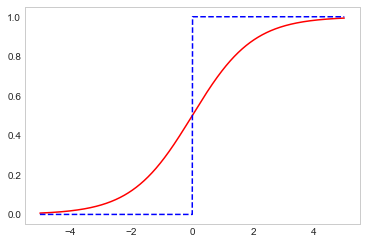

In [32]:
plt.grid()
x=np.arange(-5.0,5.0,0.01)
y1=sigmoid(x)
y2=stepf_for_numpy(x)
plt.plot(x,y1,'r-',x,y2,'b--')
plt.show()

## ReLU 함수

In [33]:
def ReLU(x):
    if x>0:
        return x
    else:
        return 0

In [34]:
print(ReLU(5))
print(ReLU(-3))

5
0


## tanh 함수

In [42]:
# def tanh(x):
#     return (np.exp(x) - np.exp(x)) / (np.exp(x) + np.exp(-x))

In [44]:
def tanh(x):
    return np.tanh(x)

In [45]:
print(tanh(3))
print(tanh(-3))

0.9950547536867305
-0.9950547536867305


### identity function

In [46]:
def idf(x):
    return x

In [47]:
print(idf(4))
print(idf(-1))

X=np.array([2,-3,0.4])
print(idf(X))

4
-1
[ 2.  -3.   0.4]


### softmax

In [49]:
# 오리지널 소프트맥스 함수
def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

In [50]:
a = np.array([0.3,0.2,4.0,-1.2])
print(softmax(a))
print(np.sum(softmax(a))) # 출력값들의 합이 1이다!

[0.02348781 0.02125265 0.9500187  0.00524084]
1.0


In [54]:
# 수치적으로 안정적인 스프트맥스
def softmax2(x):
    C = np.max(a)
    return (np.exp(a-C) / np.sum(np.exp(a-C)))

In [56]:
A = np.array([1000,900,1050,500])
print(softmax2(A))

[0.02348781 0.02125265 0.9500187  0.00524084]


In [57]:
# np.max는 array에서 최대값을 구하는 함수
np.max(np.array([1,5,3,-4]))

5

### leaky ReLU

In [58]:
def LeakyReLU(x):
    a = 0.1
    return np.maximum(a*x, x)

In [59]:
x=np.array([0.5,-1.4,3,0,5])
print(LeakyReLU(x))

[ 0.5  -0.14  3.    0.    5.  ]


### ELU

In [60]:
def ELU(x):
    alpha = 1.0
    return (x >= 0) * x + (x < 0) * alpha * (np.exp(x) - 1)

In [61]:
print(ELU(4))
print(ELU(-0.5))

x = np.array([-2,0.1,4])
print(ELU(x))

4.0
-0.3934693402873666
[-0.86466472  0.1         4.        ]


### 3층 신경망

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
import numpy as np
x=np.array([1.0,0.5,0.4])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6],[0.3,0.5,0.7]]) # weight값
b1=np.array([1,1,1]) # bias값

print(w1.shape)
print(x.shape)
print(b1.shape)

a1=np.dot(x,w1)+b1
z1=sigmoid(a1) # 활성화함수 적용

print(a1)
print(z1)

(3, 3)
(3,)
(3,)
[1.32 1.7  2.08]
[0.78918171 0.84553473 0.88894403]


In [8]:
# 2번째 layer
w2 = np.array([[0.2,0.4,0.6],[0.1,0.3,0.5],[0.4,0.6,0.8]])
b2 = np.array([1,1,1])

print(w2.shape)
print(b2.shape)

a2 = np.dot(a1,w2) +b2
z2 = sigmoid(a2)

print(a2)
print(z2)

(3, 3)
(3,)
[2.266 3.286 4.306]
[0.90602176 0.96394539 0.9866921 ]


In [9]:
# 3번째 layer
w3 = np.array([[0.1,0.3],[-0.1,-0.5],[0.3,0.5]])
b3 = np.array([1,1])

print(w3.shape)
print(b3.shape)

a3 = np.dot(a2,w3) + b3
z3 = sigmoid(a3)

print(a3)
print(z3)

(3, 2)
(2,)
[2.1898 2.1898]
[0.8993298 0.8993298]


In [10]:
#4번째 layer
w4 = np.array([[0.1,0.2],[0.3,0.5]])
b4 = np.array([1,1])

print(w4.shape)
print(b4.shape)

a4 = np.dot(a3,w4) + b4
Y = sigmoid(a4) # 최종값

print(a4)
print(Y) # 최종값

(2, 2)
(2,)
[1.87592 2.53286]
[0.86714179 0.92641356]


In [11]:
# 위에꺼 네트워크 함수로 만들기

def network():
    network = {}
    # 첫번째 레이어
    network['w1']= np.array([[0.1,0.3,0.5],[0.2,0.4,0.6],[0.3,0.5,0.7]]) # weight값
    network['b1']= np.array([1,1,1])
    
    # 두번째 레이어
    network['w2']= np.array([[0.2,0.4,0.6],[0.1,0.3,0.5],[0.4,0.6,0.8]])
    network['b2']= np.array([1,1,1])
    
    # 세번째 레이어
    network['w3']= np.array([[0.1,0.3],[-0.1,-0.5],[0.3,0.5]])
    network['b3']= np.array([1,1])
    
    # 네번쨰 레이어
    network['w4']= np.array([[0.1,0.2],[0.3,0.5]])
    network['b4']= np.array([1,1])
    
    return network

In [12]:
# 입력신호가 출력신호로 변화되는 과정을 구현하기
def forward(network,x):
    w1,w2,w3,w4 = network['w1'], network['w2'], network['w3'], network['w4']
    b1,b2,b3,b4 = network['b1'], network['b2'], network['b3'], network['b4']
    
    A1 = np.dot(x,w1) + b1
    Z1 = sigmoid(A1)
    
    A2 = np.dot(z1,w2) + b2
    Z2 = sigmoid(A2)
    
    A3 = np.dot(Z2,w3) + b3
    Z3 = sigmoid(A3)
    
    A4 = np.dot(Z3,w4) + b4
    Y = sigmoid(A4)
    
    return Y

In [13]:
net = network()
x = np.array([0.3,1.3,-2.2]) # 입력값
y = forward(net,x)
print(y)

[0.7879038  0.82442278]
